## Polinomio Interpolante usando metodo de newton 


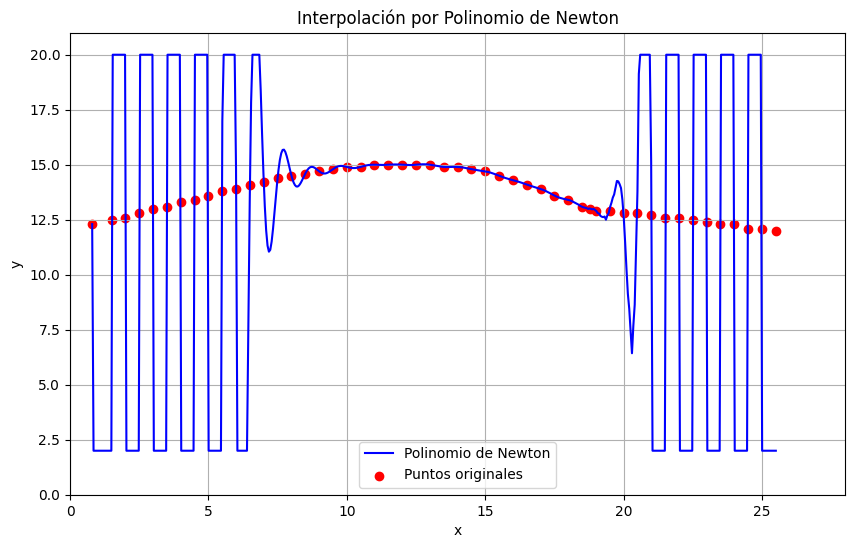

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def diferencias_divididas(x, y):
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1]) / (x[j:n] - x[j - 1])
    return coef

def polinomio_newton(coef, x_data, x_eval):
    n = len(coef)
    p = coef[-1]
    for k in range(n - 2, -1, -1):
        p = coef[k] + (x_eval - x_data[k]) * p
    return p

# Tus datos
x = np.array([
    0.8, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5,
    6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5,
    11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5,
    16, 16.5, 17, 17.5, 18, 18.5, 18.8, 19, 19.5, 20,
    20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5
])

y = np.array([
    12.3, 12.5, 12.6, 12.8, 13, 13.1, 13.3, 13.4, 13.6, 13.8,
    13.9, 14.1, 14.2, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 14.9,
    15, 15, 15, 15, 15, 14.9, 14.9, 14.8, 14.7, 14.5,
    14.3, 14.1, 13.9, 13.6, 13.4, 13.1, 13, 12.9, 12.9, 12.8,
    12.8, 12.7, 12.6, 12.6, 12.5, 12.4, 12.3, 12.3, 12.1, 12.1,
    12
])

# Obtener coeficientes
coef = diferencias_divididas(x, y)

# Evaluar el polinomio en muchos puntos para graficar
x_vals = np.linspace(min(x), max(x), 500)
y_vals = [polinomio_newton(coef, x, xi) for xi in x_vals]

# Limitar valores de Y para evitar picos extremos
y_vals = np.clip(y_vals, a_min=2, a_max=20)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Polinomio de Newton', color='blue')
plt.scatter(x, y, color='red', label='Puntos originales')
plt.title('Interpolación por Polinomio de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(0, 28)
plt.ylim(0, 21)
plt.show()

